<a href="https://colab.research.google.com/github/Bhavaz/Python/blob/master/DL/DL2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.utils import to_categorical

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.2737 - acc: 0.9155 - val_loss: 0.2484 - val_acc: 0.9186
Epoch 2/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.0926 - acc: 0.9716 - val_loss: 0.0807 - val_acc: 0.9748
Epoch 3/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0580 - acc: 0.9817 - val_loss: 0.0944 - val_acc: 0.9718
Epoch 4/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0408 - acc: 0.9865 - val_loss: 0.0779 - val_acc: 0.9756
Epoch 5/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0295 - acc: 0.9904 - val_loss: 0.0709 - val_acc: 0.9794
Epoch 6/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.0218 - acc: 0.9933 - val_loss: 0.0696 - val_acc: 0.9823
Epoch 7/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.0166 - acc: 0.9945 - val_loss: 0.0755 - val_acc

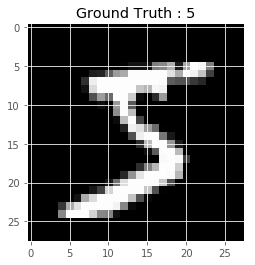

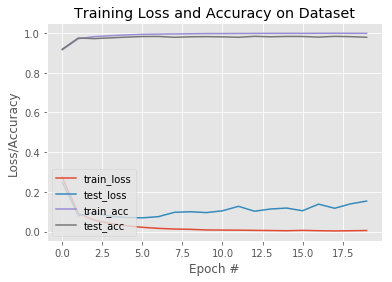

In [0]:

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()
#display the first image in the training data
plt.imshow(train_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
# plt.show()

#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

N = 20
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="test_loss")
plt.plot(np.arange(0, N), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_acc"], label="test_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")